<a href="https://colab.research.google.com/github/fanziqing/ALY6110-Individual-Lab1/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup for running PySpark

In [45]:
# install java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install Spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the Spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your Spark folder to your system path environment
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

# install findspark using pip
!pip install -q findspark

import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

# Module 3 Lab — Individual Lab #1

In [46]:
# 1 .Obtain the complete Boston Housing dataset
path = "/content/BostonHousing.csv"
df = spark.read.csv(path,header=True,inferSchema=True)

In [47]:
# 2. Show the first 5 rows of the dataset
df.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [48]:
# 3. Count number of observation in the given dataset
num_obs = df.count()
num_obs

506

In [49]:
# 4. Show the Schema of your dataset
df.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [50]:
# 5. Drop the column "b" from your dataset
df_dropb = df.drop('b')
df_dropb.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+-----+----+
only showing top 5 rows



In [51]:
# 6. Round all of the numerical columns into two decimal place
from pyspark.sql.functions import col, format_number
from pyspark.sql.types import DoubleType, IntegerType

for column in df_dropb.columns:
    if isinstance(df.schema[column].dataType, (DoubleType, IntegerType)):
        df = df.withColumn(column, format_number(col(column).cast("double"), 2))
df.show(5)


+----+-----+-----+----+----+----+-----+----+----+------+-------+------+-----+-----+
|crim|   zn|indus|chas| nox|  rm|  age| dis| rad|   tax|ptratio|     b|lstat| medv|
+----+-----+-----+----+----+----+-----+----+----+------+-------+------+-----+-----+
|0.01|18.00| 2.31|0.00|0.54|6.58|65.20|4.09|1.00|296.00|  15.30| 396.9| 4.98|24.00|
|0.03| 0.00| 7.07|0.00|0.47|6.42|78.90|4.97|2.00|242.00|  17.80| 396.9| 9.14|21.60|
|0.03| 0.00| 7.07|0.00|0.47|7.18|61.10|4.97|2.00|242.00|  17.80|392.83| 4.03|34.70|
|0.03| 0.00| 2.18|0.00|0.46|7.00|45.80|6.06|3.00|222.00|  18.70|394.63| 2.94|33.40|
|0.07| 0.00| 2.18|0.00|0.46|7.15|54.20|6.06|3.00|222.00|  18.70| 396.9| 5.33|36.20|
+----+-----+-----+----+----+----+-----+----+----+------+-------+------+-----+-----+
only showing top 5 rows



In [52]:
# 7. Create a new column (Age10)  with 10% increasing of 'age' column
df_age = df.withColumn('Age10', round(col('age') * 1.10, 2))
df_age.show(5)

+----+-----+-----+----+----+----+-----+----+----+------+-------+------+-----+-----+-----+
|crim|   zn|indus|chas| nox|  rm|  age| dis| rad|   tax|ptratio|     b|lstat| medv|Age10|
+----+-----+-----+----+----+----+-----+----+----+------+-------+------+-----+-----+-----+
|0.01|18.00| 2.31|0.00|0.54|6.58|65.20|4.09|1.00|296.00|  15.30| 396.9| 4.98|24.00|71.72|
|0.03| 0.00| 7.07|0.00|0.47|6.42|78.90|4.97|2.00|242.00|  17.80| 396.9| 9.14|21.60|86.79|
|0.03| 0.00| 7.07|0.00|0.47|7.18|61.10|4.97|2.00|242.00|  17.80|392.83| 4.03|34.70|67.21|
|0.03| 0.00| 2.18|0.00|0.46|7.00|45.80|6.06|3.00|222.00|  18.70|394.63| 2.94|33.40|50.38|
|0.07| 0.00| 2.18|0.00|0.46|7.15|54.20|6.06|3.00|222.00|  18.70| 396.9| 5.33|36.20|59.62|
+----+-----+-----+----+----+----+-----+----+----+------+-------+------+-----+-----+-----+
only showing top 5 rows



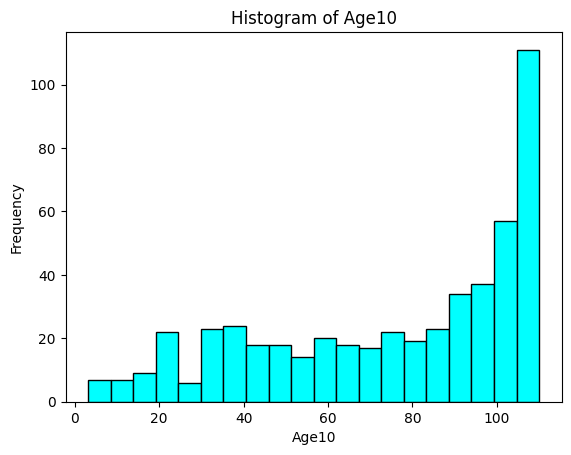

In [53]:
# 8. Plot histogram Age10 column on a 2D Plot
import matplotlib.pyplot as plt
plot_age10 = df_age.select('Age10').rdd.flatMap(lambda x: x).collect()
plt.hist(plot_age10, bins=20, color='cyan', edgecolor='black')
plt.title('Histogram of Age10')
plt.xlabel('Age10')
plt.ylabel('Frequency')
plt.show()

In [54]:
#9. Provide Summary Statistics of all columns (count, mean, stddev,min, max)
df.summary('count', 'mean', 'stddev', 'min', 'max').show()

+-------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|summary|              crim|                zn|             indus|              chas|                nox|                rm|               age|               dis|              rad|               tax|           ptratio|                 b|             lstat|              medv|
+-------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|  count|               506|               506|               506|               506|                506|               506|               506|               506|          

In [55]:
#10. Convert  Spark Dataframe to Pandas Dataframe
pandas_df = df.toPandas()

In [56]:
#11. Show the last 5 rows of Pandas DataFrame
print(pandas_df.tail(5))

     crim    zn  indus  chas   nox    rm    age   dis   rad     tax ptratio  \
501  0.06  0.00  11.93  0.00  0.57  6.59  69.10  2.48  1.00  273.00   21.00   
502  0.05  0.00  11.93  0.00  0.57  6.12  76.70  2.29  1.00  273.00   21.00   
503  0.06  0.00  11.93  0.00  0.57  6.98  91.00  2.17  1.00  273.00   21.00   
504  0.11  0.00  11.93  0.00  0.57  6.79  89.30  2.39  1.00  273.00   21.00   
505  0.05  0.00  11.93  0.00  0.57  6.03  80.80  2.50  1.00  273.00   21.00   

          b lstat   medv  
501  391.99  9.67  22.40  
502  396.90  9.08  20.60  
503  396.90  5.64  23.90  
504  393.45  6.48  22.00  
505  396.90  7.88  11.90  


In [ ]:
spark.stop()